# Defining micromagnetic system

A micromagnetic system is the main entity of the micromagnetic model. It consists of three main components:
- Energy equation
- Dynamics equation
- Magnetisation configuration

In this tutorial, we will assemble a micromagnetic system, which can then be "driven" using different drivers.

In [1]:
import micromagneticmodel as mm

Firstly, we create a the energy equation:

In [2]:
energy = mm.Exchange(A=1e-11) + mm.Zeeman(H=(1e6, 0, 0))

Next, we define the dynamics equation.

In [3]:
dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=0.1)

Finally, magnetisation configuration must be defined as `discretisationfield.Field`.

In [4]:
import discretisedfield as df

p1 = (0, 0, 0)
p2 = (10e-9, 10e-9, 10e-9)
n = (5, 5, 5)
Ms = 1e6
mesh = df.Mesh(p1=p1, p2=p2, n=n)
m = df.Field(mesh, nvdim=3, value=(0, 0, 1), norm=Ms)

Using these three parameters we can assemble the system object.

In [5]:
system = mm.System(energy=energy, dynamics=dynamics, m=m, name="mysystem")

We can now check some basics properties of the assembled system.

In [6]:
system

System(name='mysystem')

In [7]:
system.energy

Exchange(A=1e-11) + Zeeman(H=(1000000.0, 0, 0))

In [8]:
system.dynamics

Precession(gamma0=221276.14872118403) + Damping(alpha=0.1)

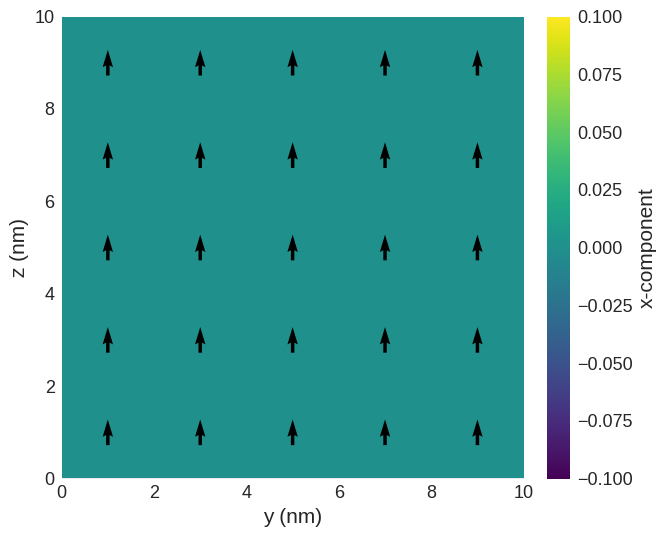

In [9]:
system.m.sel("x").mpl()